In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.swarm import Swarm
from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage


import pandas as pd
import numpy as np
import scipy
import pprint

In [3]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

In [4]:
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)

## List of available products in Mongo

In [5]:
swm_info = storage.swarms_info()
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(swm_info)

{   '_id': None,
    'alphas': [   'RenkoPatternsNoExits',
                  'SwingPoint',
                  'EXO',
                  'PointAndFigure',
                  'IchimokuCloud',
                  'MACross',
                  'BolllingerBands'],
    'exo_types': [   'CallSpread',
                     'PutSpread',
                     'ContFut',
                     'BullishCollarBW',
                     'BearishCollarBW'],
    'instruments': ['ZC', 'NG', 'ZN', 'ES', 'ZS', 'CL', 'ZW']}


## Getting swarm using filter

In [6]:
instruments_filter = ['*']  # Select ALL
#instruments_filter = ['ES', 'CL']

exo_filter = ['*'] # Select ALL
#exo_filter = ['BullishCollar']

direction_filter = [0, -1, 1] # Select ALL
#direction_filter = [1]

#alpha_filter = ['bearish-custom']  # Select ALL
alpha_filter = ['bullish-custom','bearish-custom']  # Select ALL
#alpha_filter = ['MaCross', 'PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

## Swarms loaded

In [7]:
[print(s) for s in sorted(swmdf.columns)];

CL_CallSpread_Long_PointAndFigure_largebox-bearish-custom
CL_CallSpread_Long_PointAndFigure_smallbox-bearish-custom
CL_CallSpread_Short_SwingPoint_bearish-custom
CL_CallSpread_Short_SwingPoint_bullish-custom
CL_PutSpread_Long_BolllingerBands_bullish-custom
CL_PutSpread_Long_IchimokuCloud_bullish-custom
CL_PutSpread_Long_RenkoPatternsNoExits_bullish-custom
CL_PutSpread_Short_IchimokuCloud_bearish-custom
CL_PutSpread_Short_SwingPoint_bearish-custom
ES_CallSpread_Long_SwingPoint_bullish-custom
ES_CallSpread_Short_IchimokuCloud_bearish-custom
ES_CallSpread_Short_MACross_bearish-custom
ES_PutSpread_Long_BolllingerBands_bearish-custom
ES_PutSpread_Long_IchimokuCloud_bearish-custom
ES_PutSpread_Long_SwingPoint_bearish-custom
ES_PutSpread_Short_BolllingerBands_bullish-custom
ES_PutSpread_Short_IchimokuCloud_alt2-bullish-custom
ES_PutSpread_Short_IchimokuCloud_bullish-custom
NG_CallSpread_Long_BolllingerBands_alt2-bullish-custom
NG_CallSpread_Long_BolllingerBands_alt3-bullish-custom
NG_CallSpre

### Swarms equities

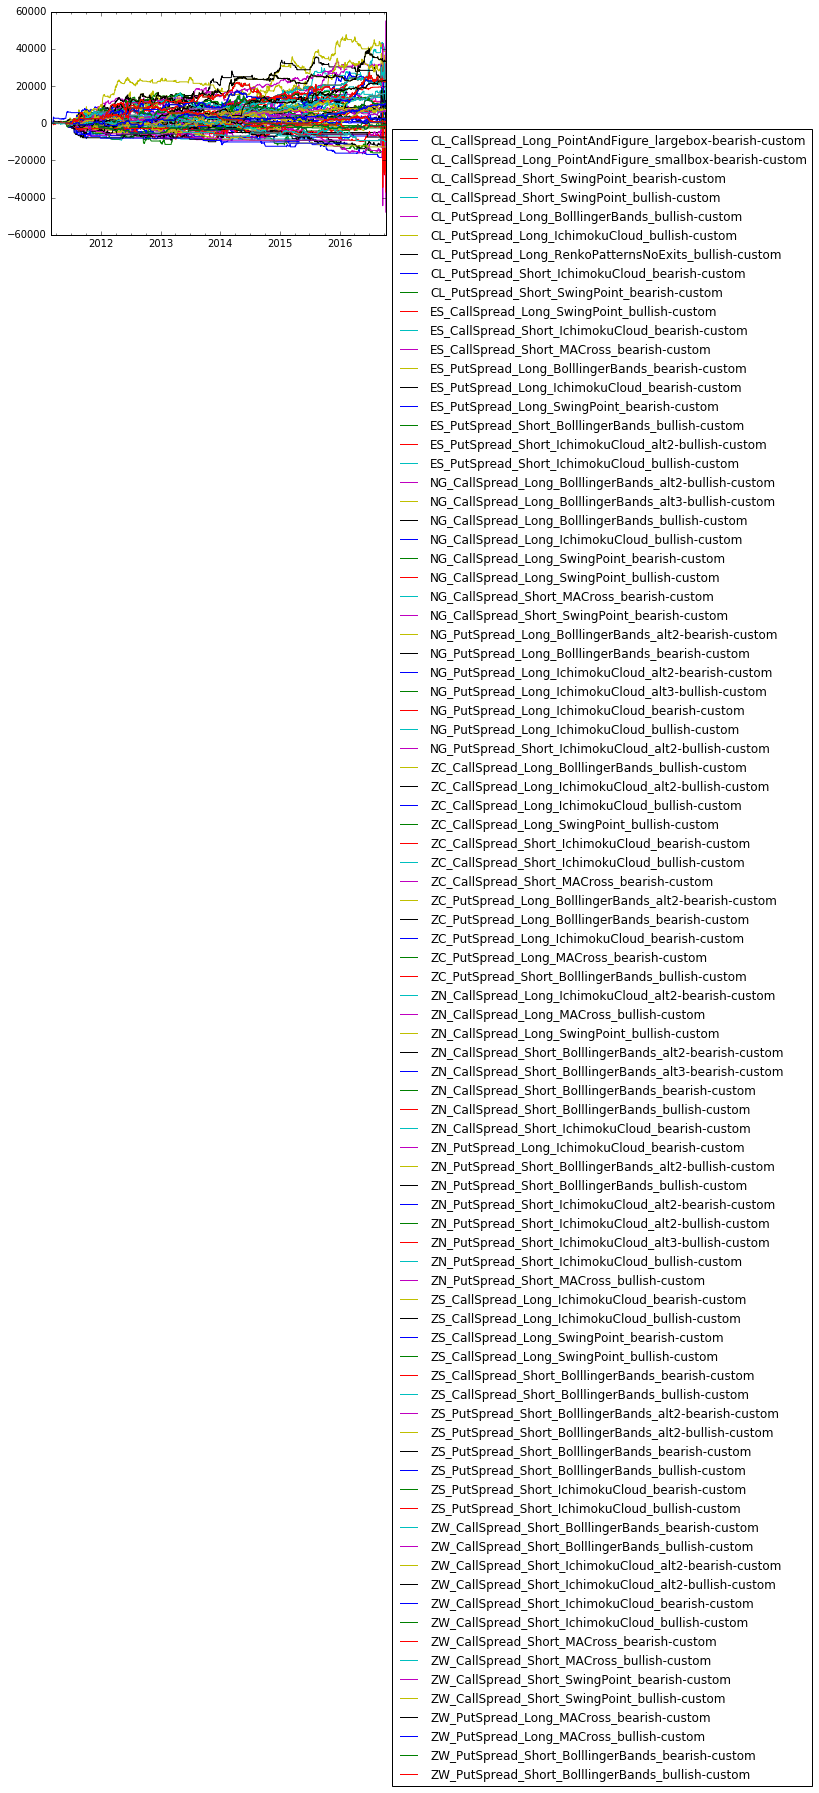

In [8]:
swmdf.plot().legend(loc='best', bbox_to_anchor=(1, 0.5));

## Individual swarm equity

In [9]:
#_swarm_name = "ES_BullishCollarBW_Long_BollingerBands"
#_swarm_name = "CL_CallSpread_Long_PointAndFigurePatterns_largebox-bearish-custom"

#swmdf[_swarm_name].plot();
#title(_swarm_name);

### Available products EXOs

In [10]:
passive_exo = {}

exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = 'NG'  # ES Collars (incl Bearish, Bullish, BW and vanilla)


print('==== Passive EXO list')
for exo_name in storage.exo_list(exo_filter):
    exo_data, exo_dict = storage.load_series(exo_name)
    passive_exo[exo_name] = exo_data['exo']

for exo in sorted(passive_exo.keys()):
    print(exo)
    
print('==== Alphas EXO list')
[print(s) for s in sorted(swmdf.columns)];

==== Passive EXO list
NG_BearishCollarBW
NG_BullishCollarBW
NG_CallSpread
NG_ContFut
NG_PutSpread
==== Alphas EXO list
CL_CallSpread_Long_PointAndFigure_largebox-bearish-custom
CL_CallSpread_Long_PointAndFigure_smallbox-bearish-custom
CL_CallSpread_Short_SwingPoint_bearish-custom
CL_CallSpread_Short_SwingPoint_bullish-custom
CL_PutSpread_Long_BolllingerBands_bullish-custom
CL_PutSpread_Long_IchimokuCloud_bullish-custom
CL_PutSpread_Long_RenkoPatternsNoExits_bullish-custom
CL_PutSpread_Short_IchimokuCloud_bearish-custom
CL_PutSpread_Short_SwingPoint_bearish-custom
ES_CallSpread_Long_SwingPoint_bullish-custom
ES_CallSpread_Short_IchimokuCloud_bearish-custom
ES_CallSpread_Short_MACross_bearish-custom
ES_PutSpread_Long_BolllingerBands_bearish-custom
ES_PutSpread_Long_IchimokuCloud_bearish-custom
ES_PutSpread_Long_SwingPoint_bearish-custom
ES_PutSpread_Short_BolllingerBands_bullish-custom
ES_PutSpread_Short_IchimokuCloud_alt2-bullish-custom
ES_PutSpread_Short_IchimokuCloud_bullish-custom
NG

# Campaign composition

Copy/paste EXO or swarm names to the 'campaign_exposure' dictionary from lists above

In [11]:
campaign_exposure = {
     #'CL_CallSpread_Long_PointAndFigurePatterns_largebox-bearish-custom': 1,
    
      #'NG_CallSpread_Long_BolllingerBands_alt2-bullish-custom ' :1,
       #'NG_CallSpread_Long_BolllingerBands_alt3-bullish-custom ' :1,
      # 'NG_CallSpread_Long_BolllingerBands_bullish-custom' :1, 
       # 'NG_CallSpread_Long_IchimokuCloud_bullish-custom ' :1,
         #'NG_CallSpread_Long_SwingPoint_bullish-custom' :1, 
      # 'NG_CallSpread_Short_SwingPoint_bearish-custom' :1, 
     #'NG_PutSpread_Long_IchimokuCloud_alt3-bullish-custom' :1,
     #'NG_PutSpread_Long_IchimokuCloud_bullish-custom' :1,
    #'NG_PutSpread_Long_BolllingerBands_bearish-custom' :1, 
      #'NG_CallSpread_Short_MACross_bearish-custom' :1,
    
    
      'NG_CallSpread_Long_SwingPoint_bearish-custom' :1,
       'NG_PutSpread_Long_BolllingerBands_alt2-bearish-custom' :1, 
       'NG_PutSpread_Long_IchimokuCloud_alt2-bearish-custom' :1, 
       'NG_PutSpread_Long_IchimokuCloud_bearish-custom' :1, 
       'NG_PutSpread_Short_IchimokuCloud_alt2-bullish-custom' :1,


    
    
    
     #
     # Passive EXO positions
     #
     #'ZN_CallSpread': -1, # Short 1 EXO units
     'NG_PutSpread': 1, # Short 1 EXO units
     #'NG_CallSpread': 1, # Short 1 EXO units
     
}

In [12]:
#campaign_dict

In [13]:
#def campaign_equity(swarms, exposure):

campaign_dict = {}
campaign_stats = {'NetProfit': 0.0, 'TradesCount': 0, 'CommissionSum': 0.0}

for camp_name, exposure in campaign_exposure.items():
    if camp_name in swmdf:
        swarm_name = camp_name
        campaign_dict[swarm_name] = swmdf[swarm_name] * exposure
        
        # TODO: implement swarm statistics
        '''
        s = smgr.picked_stats        
        campaign_stats['NetProfit'] += s['NetProfit']
        campaign_stats['TradesCount'] += s['TradesCount']
        campaign_stats['CommissionSum'] += s['CommissionSum']
        '''
        
    elif camp_name in passive_exo:
        exo_equity = passive_exo[camp_name]
        campaign_dict[camp_name] = exo_equity * exposure
    
    
campaign_portfolio = pd.DataFrame(campaign_dict)
campaign_equity = campaign_portfolio.sum(axis=1)

### Campaign members equities

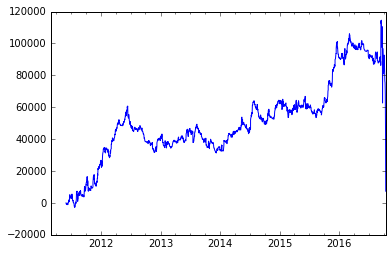

In [14]:
campaign_portfolio.sum(axis=1).plot()

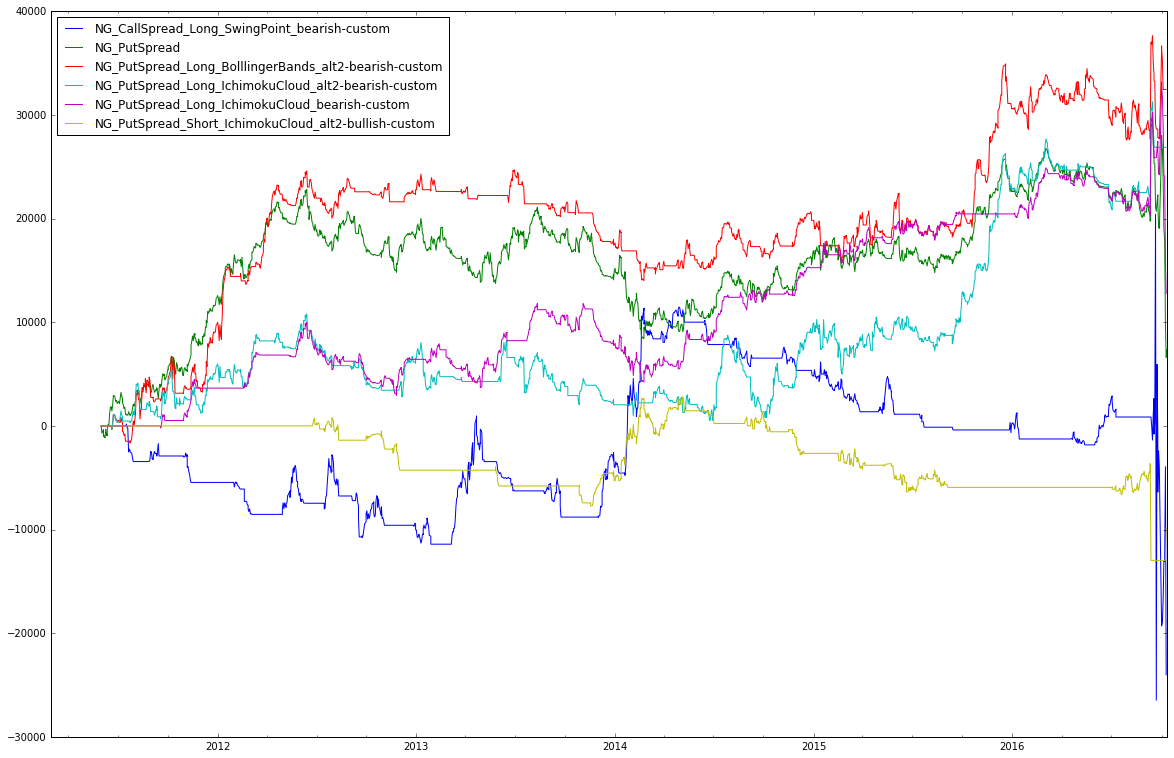

In [15]:
figsize(20,13)
campaign_portfolio.plot()

### Cumulative campaign equity

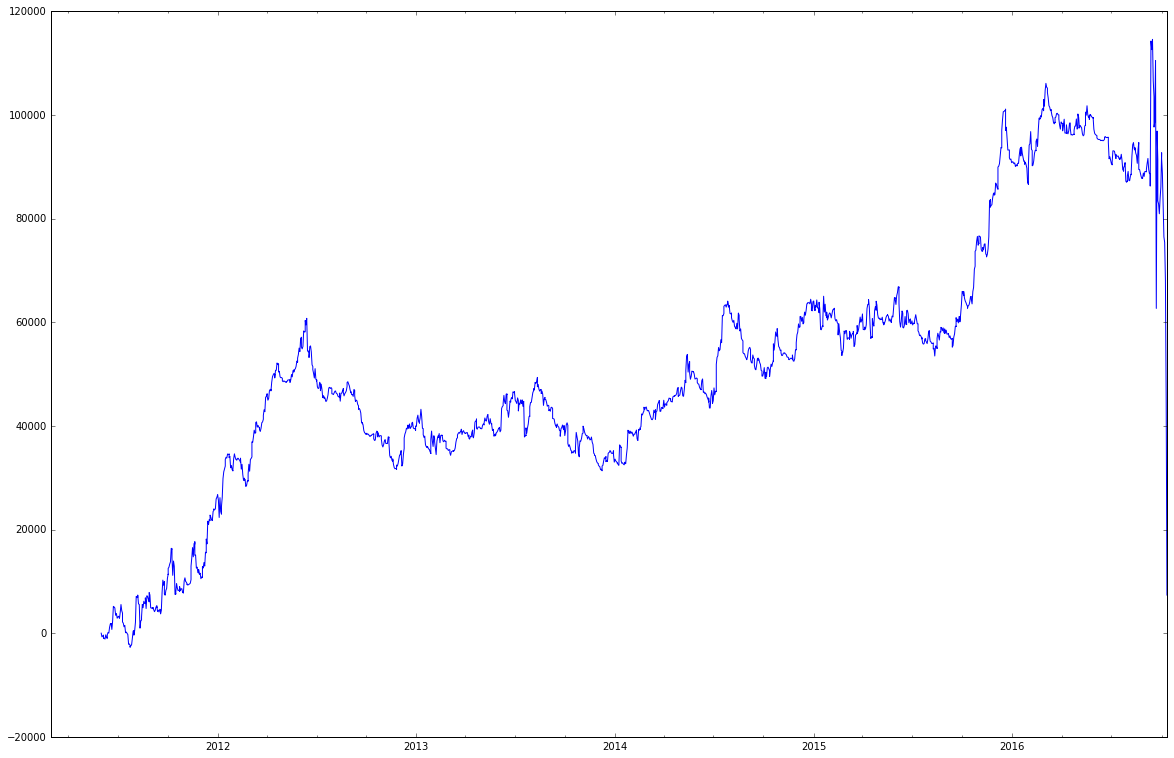

In [16]:
campaign_portfolio.sum(axis=1).plot()

# Campaign statistics

In [17]:
print(campaign_stats)

{'CommissionSum': 0.0, 'TradesCount': 0, 'NetProfit': 0.0}
